In [2]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

#On importe sous forme d'un nparray de taille 6000 x 28 x 28 6000 images de Mnist
imagefile = r'C:\Users\salvador\Downloads\train-images-idx3-ubyte\train-images.idx3-ubyte'
labelfile = r'C:\Users\salvador\Downloads\train-labels-idx1-ubyte\train-labels.idx1-ubyte'

image_array = idx2numpy.convert_from_file(imagefile)
label_array = idx2numpy.convert_from_file(labelfile)

list_colors=['red', 'blue', 'green', 'pink', 'purple', 'grey', 'teal', 'black', 'orange', 'deepskyblue']


In [3]:
def affiche (imc, cmap = plt.cm.binary):
    plt.imshow(imc, cmap=cmap)

In [4]:
from sklearn.decomposition import PCA

#### Les paramètres de notre PCA

In [5]:
# paramètre : nombre d'images et lesquelle on choisit
ind_depart = 0
nb_points = 3000
taille_im = 28*28 #(=784)
nb_dim_pca = 100


In [6]:
# On construit un nparray contenant les images mais flatten 
# pour avoir des vecteurs de taille 784 et pas des matrices 2D 
# de taillle 28x28
X = np.zeros((nb_points,taille_im))

for (i,im) in enumerate(image_array[ind_depart:ind_depart+nb_points]):
    X[i]=im.flatten()


#### Réalisation de la PCA

In [7]:
pca = PCA(n_components=nb_dim_pca)
pca.fit(X)
Y = pca.transform(X)

var_expl = pca.explained_variance_ratio_
sing_vals = pca.singular_values_


In [9]:
def trace_sing_value_var_expl():
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(sing_vals**2)
    plt.title('singuliars values')

    plt.subplot(1,2,2)
    plt.plot(var_expl)
    plt.title('variance explained')

    plt.show()

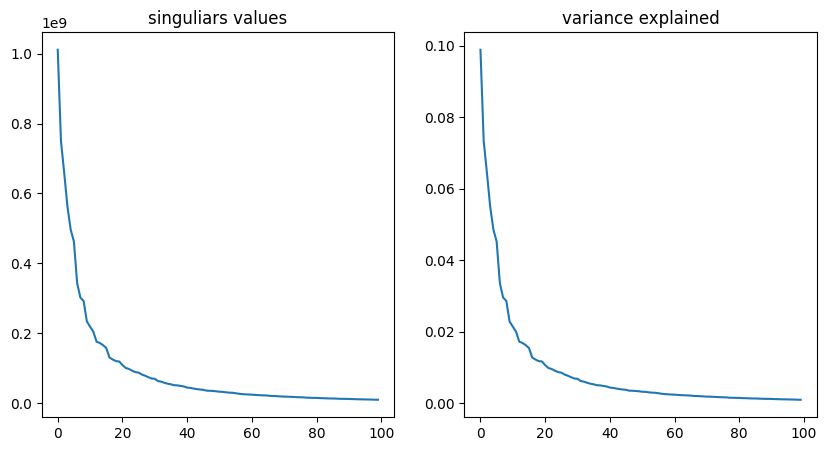

In [10]:
trace_sing_value_var_expl()

#### Nuage de points

In [39]:

def trace_nuage_point(d0 = 0, d1 = 1):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    #on trace les axes
    plt.plot(np.linspace(np.min(Y[:,d0]), np.max(Y[:,d0]), 100), np.zeros(100), color = 'k')
    plt.plot( np.zeros(100), np.linspace(np.min(Y[:,d1]), np.max(Y[:,d1]), 100), color = 'k')
    plt.plot(Y[:,d0], Y[:,d1], '*')
    plt.title('nuage point entre dim0 et dim1')

    plt.subplot(1,2,2)
    list_lab=[]
    #on trace les axes
    plt.plot(np.linspace(np.min(Y[:,d0]), np.max(Y[:,d0]), 100), np.zeros(100), color = 'k')
    plt.plot( np.zeros(100), np.linspace(np.min(Y[:,d1]), np.max(Y[:,d1]), 100), color = 'k')
    #on trace les points (on met un label uniquement 
    # au premier d'une classe qui apparait 
    # pour éviter une légende bien trop longue

    for (i,el) in enumerate(Y):
        lab = label_array[ind_depart+i]
        if lab in list_lab : 
            plt.plot(el[d0], el[d1], '.', color = list_colors[lab])
        else : 
            plt.plot(el[d0], el[d1], '.', color = list_colors[lab], label=str(lab))
            list_lab.append(lab)
    plt.title('nuage points entre dim'+str(d0)+' et dim'+str(d1)+' color by label')
    plt.legend()

In [63]:
label_array[ind_depart: ind_depart+100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

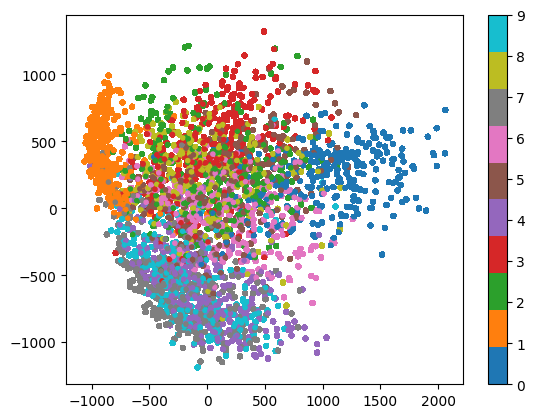

In [65]:

for i, x in enumerate(X):
        z = pca.transform(X.reshape((len(X),784)))
        plt.scatter(z[:, 0], z[:, 1], marker='.', c=label_array[ind_depart:ind_depart+len(X)], cmap='tab10')
        #if i > num_batches:
plt.colorbar()


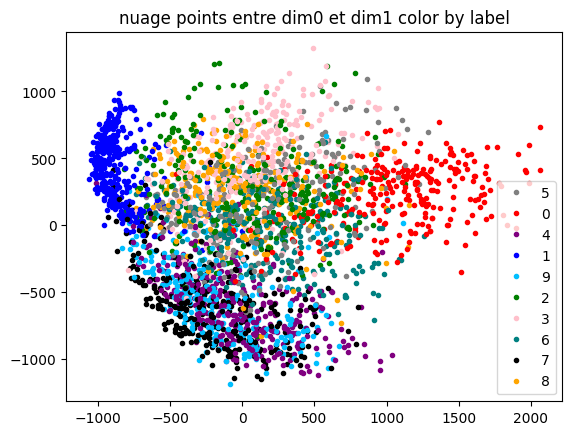

In [47]:
d0 = 0
d1 = 1
list_lab=[]
for (i,el) in enumerate(Y):
        lab = label_array[ind_depart+i]
        if lab in list_lab : 
            plt.plot(el[d0], el[d1], '.', color = list_colors[lab])
        else : 
            plt.plot(el[d0], el[d1], '.', color = list_colors[lab], label=str(lab))
            list_lab.append(lab)
plt.title('nuage points entre dim'+str(d0)+' et dim'+str(d1)+' color by label')
plt.legend()

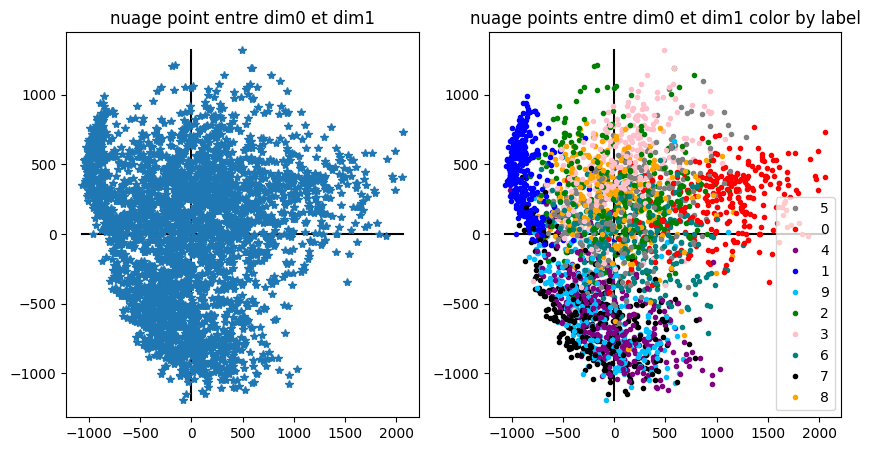

In [41]:

trace_nuage_point(d0=0,d1=1)

### Reconstruction d'image 

In [8]:
def recons(vect):
    # on veut reconstruire l'image (=une matrice 28x28) 
    # qui a donner ce vecteur par la PCA
    rec = pca.inverse_transform(vect)
    dim = rec.size
    taille = int(np.sqrt(dim))
    rec.shape = (taille,taille)
    return rec

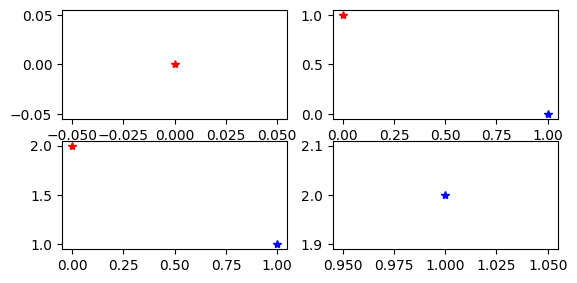

In [96]:
n= 3
for lig in range(n):
    plt.subplot(n, 2, 1+lig )
    plt.plot(0, lig, '*', color='r')

    plt.subplot(n, 2, 2+lig )
    plt.plot(1,lig, '*', color='b')

In [99]:

def compare_rec_origine(i=ind_depart, n=3):
    for ligne in range(n):

        plt.subplot(n, 2, 1+2*ligne)
        origine = X[i+ligne]
        dim = origine.size
        taille = int(np.sqrt(dim))
        origine.shape = (taille, taille)
        affiche(origine)
        plt.title("image d'origine")
        
        rec = recons(Y[i+ligne])
        plt.subplot(n, 2, 2+2*ligne)
        affiche(rec)
        plt.title('image reconstruite')

    plt.show()


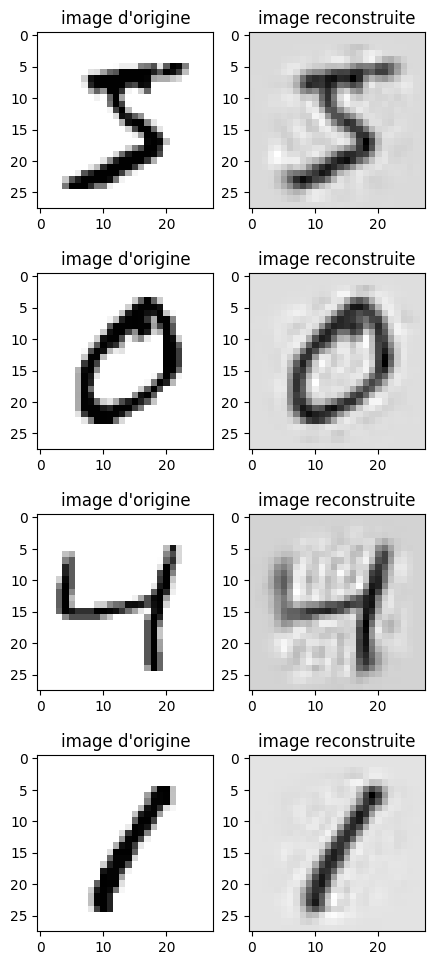

In [104]:
i=0
n=4
plt.figure(figsize=(2.5*2,3*n))
compare_rec_origine(i, n)

##### Reconstruction d'image le long d'une dimension

In [16]:

def recons_dir (var, dir=0, dim=nb_dim_pca):
    #on reconstruit le vecter moyen 
    # et ensuite on se déplace le long d'une dimension
    vects = np.zeros((5,dim))
    vects[0,dir] = -2*var
    vects[1,dir] = -var
    vects[3,dir] = var
    vects[4,dir] = 2*var

    reco = np.zeros((5, taille_im))
    for i,v in enumerate(reco) :
        reco[i] = pca.inverse_transform(vects[i])
    return reco

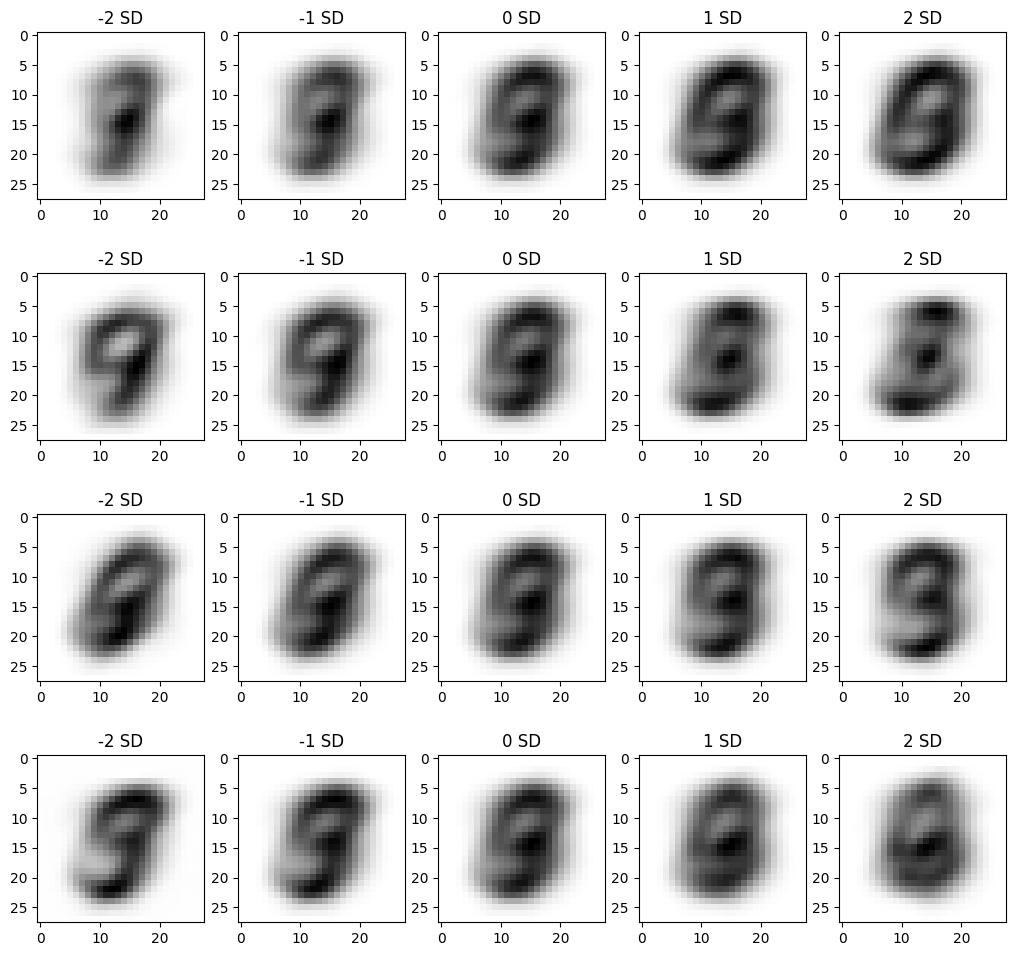

In [17]:

s0 = np.sqrt(sing_vals[0])
s1 = np.sqrt(sing_vals[1])
s2 = np.sqrt(sing_vals[2])
s3 = np.sqrt(sing_vals[3])

list_dirs = [0,1,2,3]
list_stand = [s0,s1,s2,s3]
nb_dirs = len(list_dirs)


plt.figure(figsize=(2.5*5,3*nb_dirs))
for k,d in enumerate(list_dirs):
    for i,r in enumerate(recons_dir (list_stand[k], dir=d, dim=nb_dim_pca)) :
        plt.subplot(nb_dirs,5,i+1+5*k)
        dim = r.size
        taille = int(np.sqrt(dim))
        r.shape = (taille, taille)
        affiche(r)
        plt.title(str(i-2)+' SD')
plt.show()



##### Mosaïque de reconstructions 

In [11]:
x_min = np.min(Y[:,0])
x_max = np.max(Y[:,0])
y_min = np.min(Y[:,1])
y_max = np.max(Y[:,1])
print(x_min, x_max, y_min, y_max)

-1062.0080344056425 2062.583442106269 -1189.2433223548087 1321.2253690996965


In [9]:
def plot_reconstructed(reconstructeur, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = np.array([x, y])
            x_hat = reconstructeur(z)
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])


In [23]:
plot_reconstructed(recons)

ValueError: shapes (2,) and (100,784) not aligned: 2 (dim 0) != 100 (dim 0)

In [14]:
def plot_reconstructed(recons, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    xx = np.linspace(x_min, x_max, n)
    yy = np.linspace(y_min, y_max, n)

    for j,y in enumerate(reversed(yy)):
        for i,x in enumerate(xx):
            vect = np.zeros(nb_dim_pca)
            vect[0]= x 
            vect[1] = y 
            x_hat = recons(vect)
            img[i*w:(i+1)*w, (n-j-1)*w:(n-j)*w] = np.transpose(x_hat)
    plt.imshow(np.transpose(img), extent=[*r0, *r1])

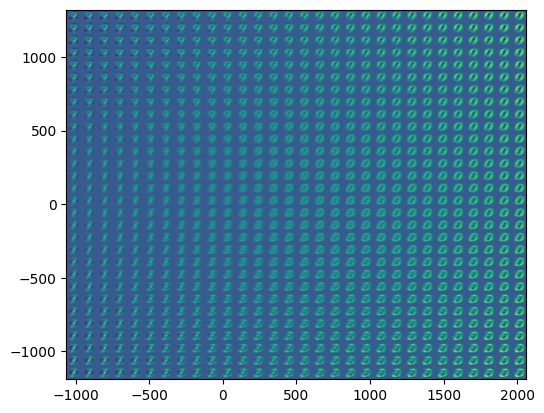

In [16]:
plot_reconstructed(recons, r0=(x_min, x_max), r1=(y_min, y_max), n=30)

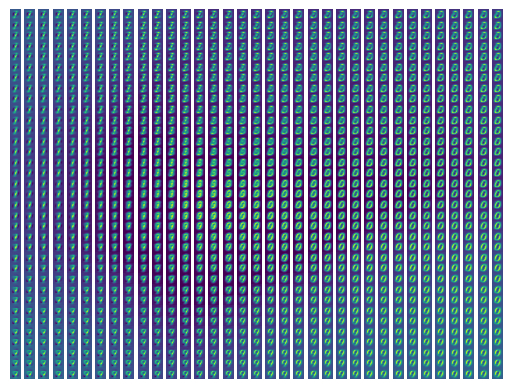

In [12]:
nb_im = 35
xx = np.linspace(x_min, x_max, nb_im )
yy = np.linspace(y_min, y_max, nb_im )

plt.figure()
i=1
for y in reversed(yy):
    for x in xx:
        plt.subplot(nb_im, nb_im, i)
        vect = np.zeros(nb_dim_pca)
        vect[0]= x 
        vect[1] = y 
        rec = recons(vect)
        affiche(rec, cmap='viridis')
        plt.axis('off')
        #pour vérifier la position 
        # plt.title(str(i)+', x : '+str(int(x))+', y : '+str(int(y)))
        i+=1
plt.subplots_adjust( wspace =0, hspace = 0) 

        